In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 1000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [29]:
kappa = 5
P = 100
T = 30

In [30]:
x = bernouli_gaussian(N, rho)
SNR = 60

In [31]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)

# i.i.d.ガウス行列での信号再構成

In [32]:
tmp1G = AMP(iidG.A, x, SNR)
tmp2G = D_AMP(iidG.A, x, SNR, P)
tmp3G = OAMP(iidG.A, x, SNR)
tmp4G = D_OAMP(iidG.A, x, SNR, P)

final mse: 0.16933324995800703


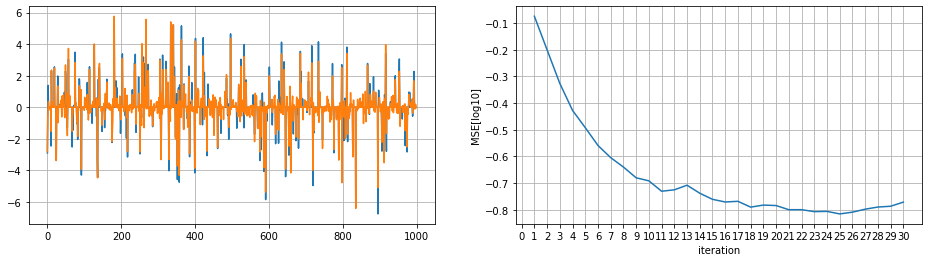

In [33]:
tmp1G.estimate(T=T)
tmp1G.result()

In [34]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp2G.estimate(T=T, log=True)

N(P-1): 99000


0/30: tau = 2.5751096745231146, v = 1.286911842824448
Rp: 36709.0 	 F: 491 	 F\Rp: 30970
Total Communication Cost: 67679
1/30: tau = 1.581770337763593, v = 0.7902421744446874
Rp: 38872.0 	 F: 532 	 F\Rp: 32346
Total Communication Cost: 71218
2/30: tau = 1.2212129942243348, v = 0.6099635026750582
Rp: 37964.0 	 F: 534 	 F\Rp: 32904
Total Communication Cost: 70868
3/30: tau = 0.9051528046248214, v = 0.4519334078753015
Rp: 34163.0 	 F: 519 	 F\Rp: 33886
Total Communication Cost: 68049
4/30: tau = 0.5775829977794473, v = 0.28814850445261453
Rp: 41103.0 	 F: 590 	 F\Rp: 34330
Total Communication Cost: 75433
5/30: tau = 0.4609489086469083, v = 0.2298314598863451
Rp: 41661.0 	 F: 576 	 F\Rp: 33350
Total Communication Cost: 75011
6/30: tau = 0.37460783554699606, v = 0.18666092333638895
Rp: 41460.0 	 F: 608 	 F\Rp: 35159
Total Communication Cost: 76619
7/30: tau = 0.3420742119337976, v = 0.17039411152978978
Rp: 42832.0 	 F: 579 	 F\Rp: 32782
Total Communication Cost: 75614
8/30: 

final mse: 0.3611420889484097


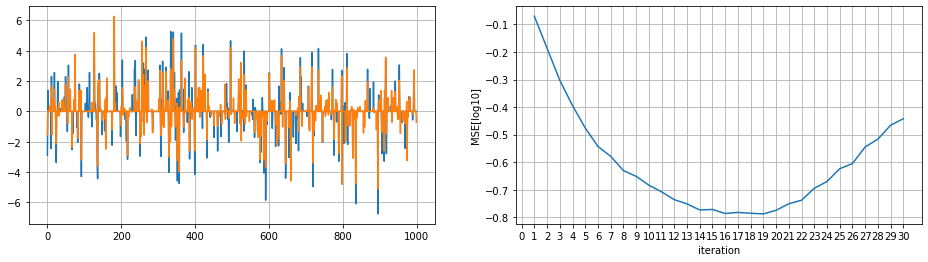

In [35]:
tmp2G.result()

final mse: 0.07211498032058006


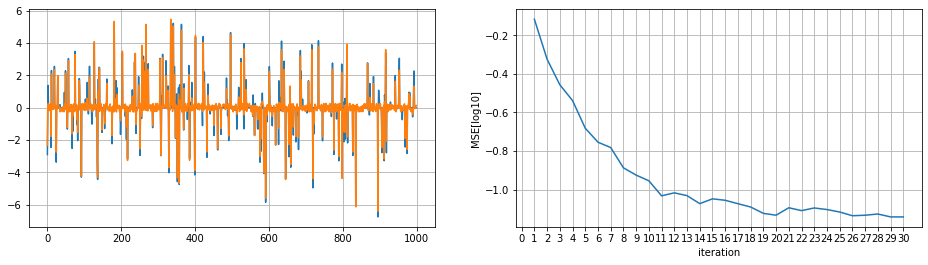

In [36]:
tmp3G.estimate(T=T)
tmp3G.result()

In [37]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp4G.estimate(T=T, log=True)

N(P-1): 99000


0/30: tau = 1.289374692708579, v = 1.2867874328507636
Rp: 65069.0 	 F: 481 	 F\Rp: 16800
Total Communication Cost: 81869
1/30: tau = 0.7032222286451948, v = 0.7006361757504321
Rp: 64967.0 	 F: 475 	 F\Rp: 16494
Total Communication Cost: 81461
2/30: tau = 0.39891386107692317, v = 0.39633091489057193
Rp: 65127.0 	 F: 531 	 F\Rp: 18362
Total Communication Cost: 83489
3/30: tau = 0.27399207672329756, v = 0.2714134031158721
Rp: 64837.0 	 F: 549 	 F\Rp: 19064
Total Communication Cost: 83901
4/30: tau = 0.24544119108216467, v = 0.24286502186027273
Rp: 64849.0 	 F: 507 	 F\Rp: 17706
Total Communication Cost: 82555
5/30: tau = 0.1667382275684625, v = 0.1641666386323552
Rp: 64998.0 	 F: 536 	 F\Rp: 18484
Total Communication Cost: 83482
6/30: tau = 0.12373893978743682, v = 0.121174642149084
Rp: 64834.0 	 F: 512 	 F\Rp: 17745
Total Communication Cost: 82579
7/30: tau = 0.09810015235160541, v = 0.09554326305933049
Rp: 64922.0 	 F: 536 	 F\Rp: 18341
Total Communication Cost: 83263
8/

final mse: 0.008111736175384021


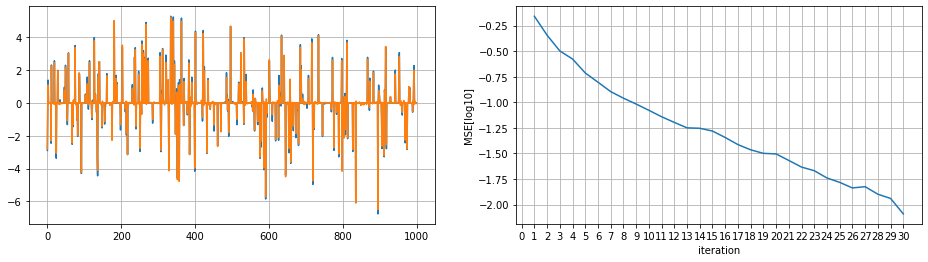

In [38]:
tmp4G.result()

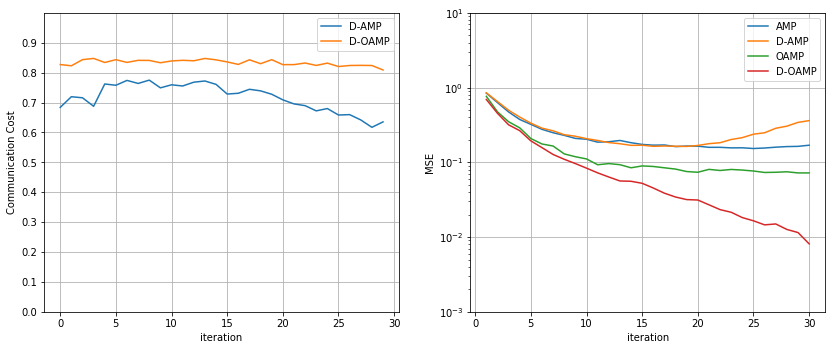

In [39]:
cc_dict = {"D-AMP": tmp2G.communication_cost, "D-OAMP": tmp4G.communication_cost}
mse_dict = {"AMP": tmp1G.mse, "D-AMP": tmp2G.mse, "OAMP": tmp3G.mse, "D-OAMP": tmp4G.mse}

plt.figure(figsize=(14, 5.5))
plt.subplot(121)
plt_CC(N, P, T, cc_dict)
plt.subplot(122)
plt_MSE(T, mse_dict)

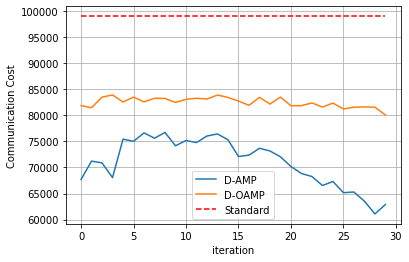

In [40]:
plt.xlabel("iteration")
plt.ylabel("Communication Cost")
plt.xticks(np.arange(0, T+1, 5))
plt.plot(tmp2G.communication_cost, label="D-AMP")
plt.plot(tmp4G.communication_cost, label="D-OAMP")
plt.plot(np.array([N * (P-1) for _ in range(T)]), ls='--', color='r', label="Standard")
plt.legend()
plt.grid()

In [41]:
www = np.empty((T, P, N))
tau = np.empty((T, P))
#sigma = [tmp2G.amps[p].sigma_p for p in range(P)]

for t in range(T):
    www[t] = tmp2G.www[t][0].reshape(P, N)
    tau[t] = tmp2G.www[t][1]

In [42]:
if P <= 5:
    plt_detail(N, P, T, www, tau)

In [43]:
www = np.empty((T, P, N))
tau = np.empty((T, P))
#sigma = [tmp4G.amps[p].sigma_p for p in range(P)]

for t in range(T):
    www[t] = tmp4G.www[t][0].reshape(P, N)
    tau[t] = tmp4G.www[t][1]

In [44]:
if P <= 5:
    plt_detail(N, P, T, www, tau)

# ユニタリ不変行列での信号再構成

In [45]:
tmp1U = AMP(UniInv.A, x, SNR)
tmp2U = D_AMP(UniInv.A, x, SNR, P)
tmp3U = OAMP(UniInv.A, x, SNR)
tmp4U = D_OAMP(UniInv.A, x, SNR, P)

final mse: 7.951263108029305e+57


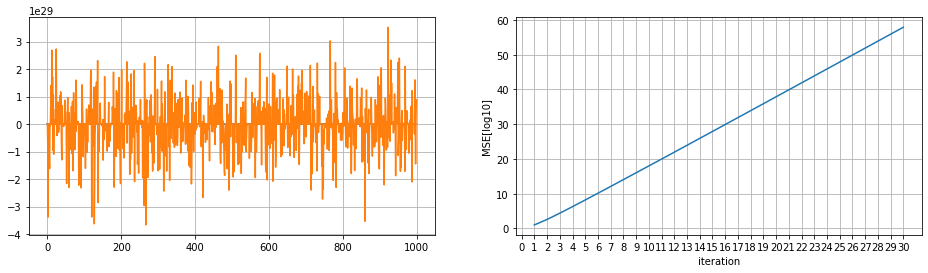

In [46]:
tmp1U.estimate(T=T)
tmp1U.result()

In [47]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp2U.estimate(T=T, log=True)

N(P-1): 99000


0/30: tau = 2.5445217515295004, v = 1.270726093369032
Rp: 70267.0 	 F: 770 	 F\Rp: 22790
Total Communication Cost: 93057
1/30: tau = 89.1084646966616, v = 44.552697565935084
Rp: 63878.0 	 F: 778 	 F\Rp: 27987
Total Communication Cost: 91865
2/30: tau = 4341.729118840789, v = 2170.863024637998
Rp: 65426.0 	 F: 765 	 F\Rp: 26317
Total Communication Cost: 91743
3/30: tau = 299336.5318500012, v = 149668.26439021822
Rp: 66060.0 	 F: 760 	 F\Rp: 25729
Total Communication Cost: 91789
4/30: tau = 23776942.510952126, v = 11888471.25394128
Rp: 66260.0 	 F: 761 	 F\Rp: 25663
Total Communication Cost: 91923
5/30: tau = 2023351672.6800013, v = 1011675836.3384657
Rp: 66351.0 	 F: 742 	 F\Rp: 24895
Total Communication Cost: 91246
6/30: tau = 178389940375.20288, v = 89194970187.5999
Rp: 66571.0 	 F: 742 	 F\Rp: 24743
Total Communication Cost: 91314
7/30: tau = 16336969939339.309, v = 8168484969669.652
Rp: 66516.0 	 F: 741 	 F\Rp: 24733
Total Communication Cost: 91249
8/30: tau = 151337

final mse: 1.0770022007596789e+58


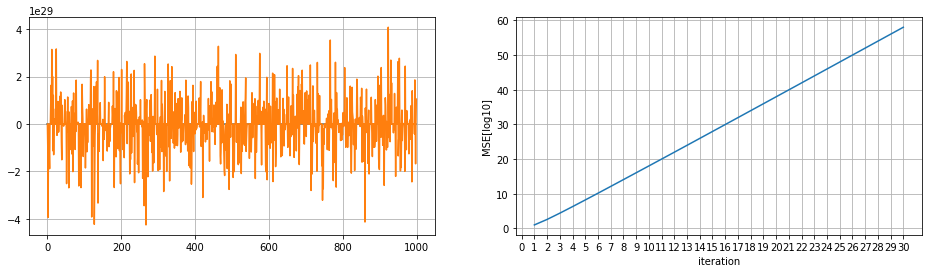

In [48]:
tmp2U.result()

final mse: 0.008737021301445115


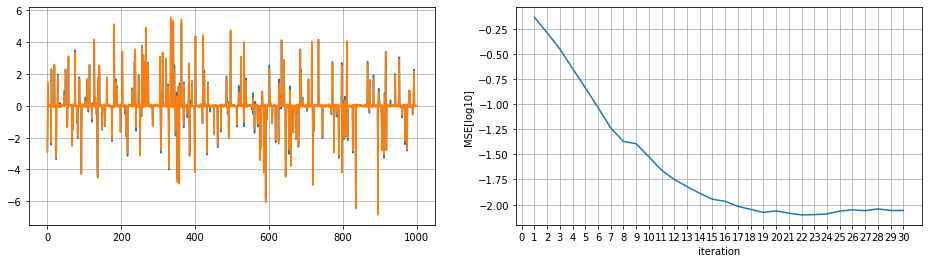

In [49]:
tmp3U.estimate(T=T)
tmp3U.result()

In [50]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp4U.estimate(T=T, C=1.85, log=True)

N(P-1): 99000


0/30: tau = 1.2734841694564667, v = 1.2706591231992257
Rp: 66565.0 	 F: 490 	 F\Rp: 16501
Total Communication Cost: 83066
1/30: tau = 0.5997220878583398, v = 0.596898276580284
Rp: 66668.0 	 F: 509 	 F\Rp: 16879
Total Communication Cost: 83547
2/30: tau = 0.46696599838801084, v = 0.4641446723319887
Rp: 66933.0 	 F: 493 	 F\Rp: 16291
Total Communication Cost: 83224
3/30: tau = 0.29433736933033927, v = 0.2915187095045406
Rp: 66562.0 	 F: 521 	 F\Rp: 17175
Total Communication Cost: 83737
4/30: tau = 0.1893388645857578, v = 0.18652519114776905
Rp: 66564.0 	 F: 544 	 F\Rp: 18140
Total Communication Cost: 84704
5/30: tau = 0.13993783514005959, v = 0.1371302629480094
Rp: 66302.0 	 F: 513 	 F\Rp: 17138
Total Communication Cost: 83440
6/30: tau = 0.09137758551114207, v = 0.08857884438783115
Rp: 66388.0 	 F: 522 	 F\Rp: 17324
Total Communication Cost: 83712
7/30: tau = 0.06518535642983585, v = 0.06239988790869306
Rp: 66372.0 	 F: 515 	 F\Rp: 16882
Total Communication Cost: 83254
8

final mse: 0.003811811329767195


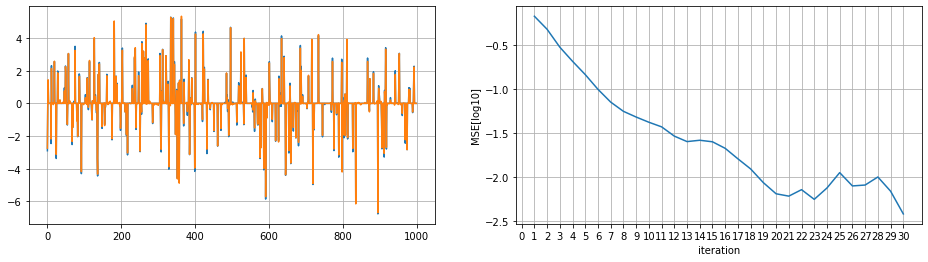

In [51]:
tmp4U.result()

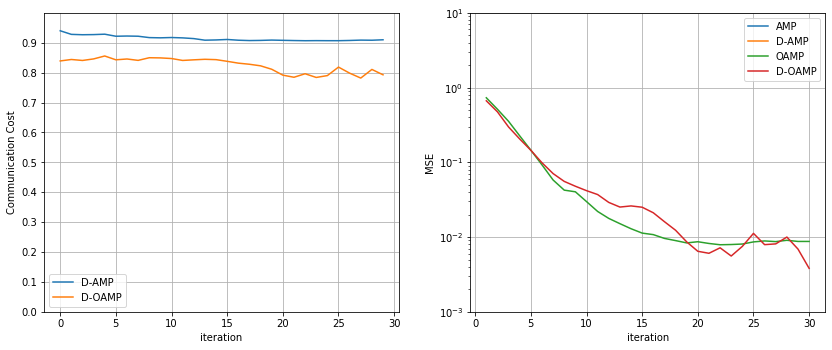

In [52]:
cc_dict = {"D-AMP": tmp2U.communication_cost, "D-OAMP": tmp4U.communication_cost}
mse_dict = {"AMP": tmp1U.mse, "D-AMP": tmp2U.mse, "OAMP": tmp3U.mse, "D-OAMP": tmp4U.mse}

plt.figure(figsize=(14, 5.5))
plt.subplot(121)
plt_CC(N, P, T, cc_dict)
plt.subplot(122)
plt_MSE(T, mse_dict)

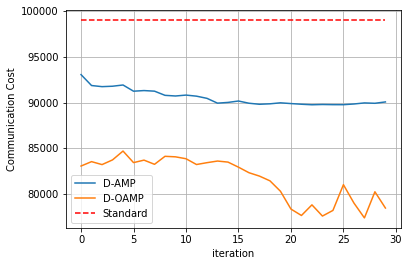

In [53]:
plt.xlabel("iteration")
plt.ylabel("Communication Cost")
plt.xticks(np.arange(0, T+1, 5))
plt.plot(tmp2U.communication_cost, label="D-AMP")
plt.plot(tmp4U.communication_cost, label="D-OAMP")
plt.plot(np.array([N * (P-1) for _ in range(T)]), ls='--', color='r', label="Standard")
plt.legend()
plt.grid()